<h1>**Homework 2 - IEEE Fraud Detection**</h1>

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/sample_submission.csv


In [155]:
#read data from the dataset
train_transaction_df = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
train_identity_df = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')

#extracting the desired data
train_trans_myCols = train_transaction_df[['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'addr1', 'addr2', 'dist1', 'dist2']]
train_ID_myCols = train_identity_df[['TransactionID', 'DeviceType', 'DeviceInfo']]

#merging data from identity table
train_data = pd.merge(train_trans_myCols, train_ID_myCols, how='left', on='TransactionID')

<h2>**Part 1 - Fraudulent vs Non-Fraudulent Transaction**</h2>

In [156]:
#separating the fradulent and non fradulent transactions
fradulentTrans = train_data[train_data['isFraud']==1]
nonFradulentTrans = train_data[train_data['isFraud']==0]

In [157]:
#For Device Type
print(train_data.groupby('DeviceType')['TransactionID'].count())
print((fradulentTrans.groupby('DeviceType')['TransactionID'].count()/(fradulentTrans.groupby('DeviceType')['TransactionID'].count()+nonFradulentTrans.groupby('DeviceType')['TransactionID'].count()))*100)

DeviceType
desktop    85165
mobile     55645
Name: TransactionID, dtype: int64
DeviceType
desktop     6.521458
mobile     10.166232
Name: TransactionID, dtype: float64


We can see a higher percent of fradulent transactions on mobile devices even though the number of total transactions on mobiles is less than that of desktop. <br>
This implies higher chances of fraud happening on mobile devices.

In [158]:
#By ProductCD
print((fradulentTrans.groupby('ProductCD')['TransactionID'].count()/(fradulentTrans.groupby('ProductCD')['TransactionID'].count()+nonFradulentTrans.groupby('ProductCD')['TransactionID'].count()))*100)

ProductCD
C    11.687269
H     4.766231
R     3.782594
S     5.899553
W     2.039939
Name: TransactionID, dtype: float64


Percentage of fraudulent transactions for each product. Product C has the highest percentage which is almost double of the next highest value. This can imply more chances of fraud happening on product C.

In [159]:
#For different types of card service providers
print(train_data.groupby('card4')['TransactionID'].count())
print((fradulentTrans.groupby('card4')['TransactionID'].count()/(fradulentTrans.groupby('card4')['TransactionID'].count()+nonFradulentTrans.groupby('card4')['TransactionID'].count()))*100)

card4
american express      8328
discover              6651
mastercard          189217
visa                384767
Name: TransactionID, dtype: int64
card4
american express    2.869837
discover            7.728161
mastercard          3.433095
visa                3.475610
Name: TransactionID, dtype: float64


Higher risk on Discover cards!

In [160]:
#Analysis of card6 column. Credit vs Debit card.
print(train_data.groupby('card6')['TransactionID'].count())
print((fradulentTrans.groupby('card6')['TransactionID'].count()/(fradulentTrans.groupby('card6')['TransactionID'].count()+nonFradulentTrans.groupby('card6')['TransactionID'].count()))*100)

card6
charge card            15
credit             148986
debit              439938
debit or credit        30
Name: TransactionID, dtype: int64
card6
charge card             NaN
credit             6.678480
debit              2.426251
debit or credit         NaN
Name: TransactionID, dtype: float64


Credit cards have higher percent of fraudulent transactions.

In [161]:
#Fraudulent transactions with purchaser email domain
print((fradulentTrans.groupby('P_emaildomain')['TransactionID'].count()/(fradulentTrans.groupby('P_emaildomain')['TransactionID'].count()+nonFradulentTrans.groupby('P_emaildomain')['TransactionID'].count()))*100)

P_emaildomain
aim.com             12.698413
anonymous.com        2.321747
aol.com              2.181060
att.net              0.743863
bellsouth.net        2.776323
cableone.net         1.886792
centurylink.net           NaN
cfl.rr.com                NaN
charter.net          3.063725
comcast.net          3.118661
cox.net              2.081838
earthlink.net        2.140078
embarqmail.com       3.461538
frontier.com         2.857143
frontiernet.net      2.564103
gmail                2.217742
gmail.com            4.354185
gmx.de                    NaN
hotmail.co.uk             NaN
hotmail.com          5.295028
hotmail.de                NaN
hotmail.es           6.557377
hotmail.fr                NaN
icloud.com           3.143450
juno.com             1.863354
live.com             2.762249
live.com.mx          5.473965
live.fr                   NaN
mac.com              3.211009
mail.com            18.962433
me.com               1.773982
msn.com              2.199413
netzero.com               

In [162]:
#Fraudulent transactions with recepient email domain
print((fradulentTrans.groupby('R_emaildomain')['TransactionID'].count()/(fradulentTrans.groupby('R_emaildomain')['TransactionID'].count()+nonFradulentTrans.groupby('R_emaildomain')['TransactionID'].count()))*100)

R_emaildomain
aim.com              2.777778
anonymous.com        2.912952
aol.com              3.485544
att.net                   NaN
bellsouth.net        0.473934
cableone.net              NaN
centurylink.net           NaN
cfl.rr.com                NaN
charter.net          3.937008
comcast.net          1.158940
cox.net              2.396514
earthlink.net        7.594937
embarqmail.com            NaN
frontier.com              NaN
frontiernet.net           NaN
gmail                     NaN
gmail.com           11.918386
gmx.de                    NaN
hotmail.co.uk             NaN
hotmail.com          7.779272
hotmail.de                NaN
hotmail.es           6.849315
hotmail.fr                NaN
icloud.com          12.875536
juno.com                  NaN
live.com             4.986877
live.com.mx          5.835544
live.fr                   NaN
mac.com              0.917431
mail.com            37.704918
me.com               1.978417
msn.com              0.117371
netzero.com               

40.79% of fradulent transactions occured with customers using protonmail.com and 95% with recepients. <br>
Could be that the security on protonmail is seriously broken.

<h2>**Part 2 - Transaction Frequency**</h2>

In [163]:
#extracting details of country with code 87.0 along with Day and Hour values from TransactionDT
transTime87 = train_data[train_data['addr2']==87.0][['TransactionID','TransactionDT','TransactionAmt']]
transTimeDetails = pd.DataFrame({'Day':np.floor(((transTime87['TransactionDT'])/86400)), 'Hour': ((transTime87['TransactionDT'])/3600)%24})

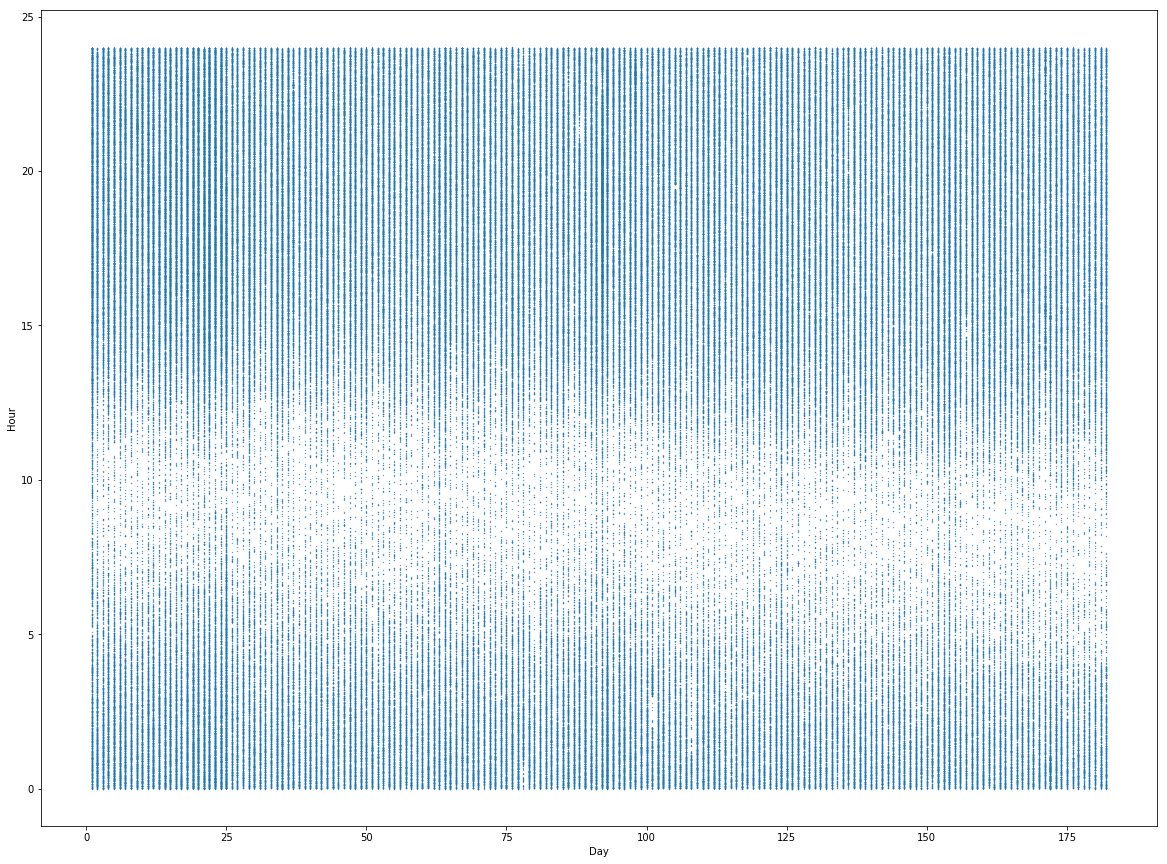

In [164]:
#plotting all the transactions of all the days to determine the sleeping hours
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
transTimeDetails.plot.scatter('Day','Hour',s=0.1, ax=ax)

From the above plot, we can see the sparseness in data points between 5 and 10 hours on all the days.
This sparseness varies a little through all the days, which might represent the changing sleep timings due to changing seasons.

In [165]:
#calculating Day, Hour and Minutes from TransactionDT
transTime87.insert(3, "Day", np.floor(((transTime87['TransactionDT'])/86400+1)), True)
transTime87.insert(4, "Hour", ((transTime87['TransactionDT'])/3600)%24, True)
transTime87.insert(5, "Minutes", ((transTime87['TransactionDT'])/60)%60, True)
transTime87.head()

,TransactionID,TransactionDT,TransactionAmt,Day,Hour,Minutes
0,2987000,86400,68.5,2.0,0.000000,0.000000
1,2987001,86401,29.0,2.0,0.000278,0.016667
2,2987002,86469,59.0,2.0,0.019167,1.150000
3,2987003,86499,50.0,2.0,0.027500,1.650000
4,2987004,86506,50.0,2.0,0.029444,1.766667


(0, 800)

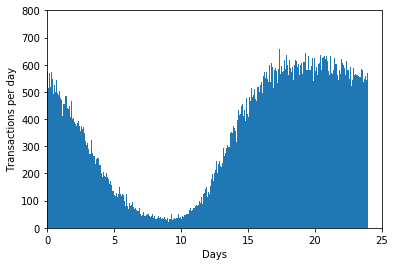

In [166]:
#similar to the above plot, representing the sleep hours, hours of higher transactions more distinctly.
plt.hist(transTime87['Hour'], bins=1500)
plt.xlim(0, 25)
plt.xlabel('Days')
plt.ylabel('Transactions per day')
plt.ylim(0,800)

The above plot is similar to the previous one, exccept that it clearly shows how the number of transactions varied through the day.

In [167]:
#Adjusting the timing - unnecessary, commented the plot
transTimeDetails = pd.DataFrame({'Day':np.floor(((transTime87['TransactionDT']-9*3600)/86400+1)), 
                                 'Hour': ((transTime87['TransactionDT']-9*3600)/3600)%24,
                                'Minutes': ((transTime87['TransactionDT']-9*3600)/60)%60})

#fig, ax = plt.subplots()
#fig.set_size_inches(20, 15)
#transTimeDetails.plot.scatter('Day','Hour',s=0.1, ax=ax)

In [168]:
#tried adjusting the transaction times over all the days - 
#can be used for classifying and adjusting data according to timezones
purchaseAmt = transTime87.groupby('TransactionDT')['TransactionAmt'].sum().reset_index()
purchaseAmt.insert(2, "Day", np.floor(((purchaseAmt['TransactionDT']-9*3600)/86400+1)), True)
purchaseAmt.insert(3, "Hour", ((purchaseAmt['TransactionDT']-9*3600)/3600)%24, True)
purchaseAmt.insert(4, "Minutes", ((purchaseAmt['TransactionDT']-9*3600)/60)%60, True)

<h2>**Part 3 - Product Code**</h2>

In [169]:
#calculating the log of TransactionAmt to use for plotting the total amounts of each product
productCost = train_data[['ProductCD', 'TransactionAmt']]
productCost.insert(2, "TransactionAmtLog", np.log(transTime87['TransactionAmt']), True)

In [170]:
#details about the TransactionAmt for each product
productCost.groupby('ProductCD')['TransactionAmt'].describe()

,count,mean,std,min,25%,50%,75%,max
ProductCD,,,,,,,,
C,68519.0,42.872353,38.943070,0.251,18.423,31.191,54.102,712.896
H,33024.0,73.170058,61.950955,15.000,35.000,50.000,100.000,500.000
R,37699.0,168.306188,142.035568,25.000,100.000,125.000,200.000,1800.000
S,11628.0,60.269487,80.546775,5.000,20.000,35.000,80.000,1550.000
W,439670.0,153.158554,268.733692,1.000,49.000,78.500,146.000,31937.391


From the above analysis we can see that the prices of product R has been been the highest for more than 75% of the records(along with the **highest average**).<br>
And product C has the lowest prices for most(more than 75%) of the records(also **lowest average**).<br>
So we can say that R is the most expensive product and C is the cheapest product.

<h3>**Additional Analysis on ProductCD and TransactionAmtLog**</h3>

In [171]:
x1 = productCost.loc[productCost.ProductCD=='C', 'TransactionAmtLog']
x2 = productCost.loc[productCost.ProductCD=='H', 'TransactionAmtLog']
x3 = productCost.loc[productCost.ProductCD=='R', 'TransactionAmtLog']
x4 = productCost.loc[productCost.ProductCD=='S', 'TransactionAmtLog']
x5 = productCost.loc[productCost.ProductCD=='W', 'TransactionAmtLog']

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


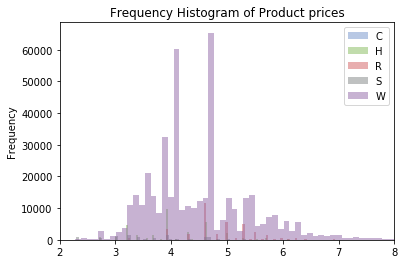

In [172]:
#frequencies of transaction amounts for all products
kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='#7293CB', label='C')
plt.hist(x2, **kwargs, color='#84BA5B', label='H')
plt.hist(x3, **kwargs, color='#D35E60', label='R')
plt.hist(x4, **kwargs, color='#808585', label='S')
plt.hist(x5, **kwargs, color='#9067A7', label='W')
plt.gca().set(title='Frequency Histogram of Product prices', ylabel='Frequency')
plt.xlim(2,8)
plt.legend();

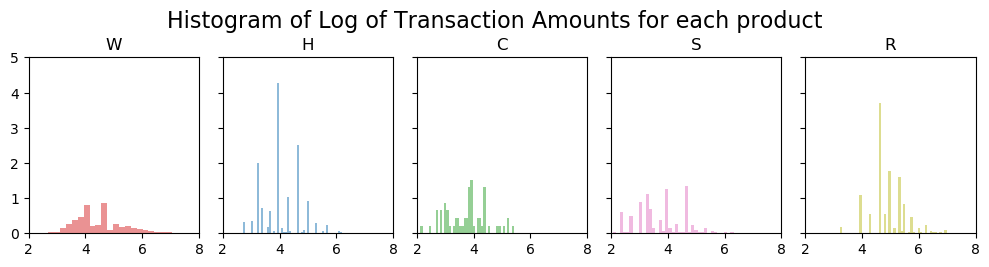

In [173]:
#ProductCD and log of transactionAmt
fig, axes = plt.subplots(1, 5, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i, (ax, ProductCD) in enumerate(zip(axes.flatten(), productCost.ProductCD.unique())):
    x = productCost.loc[productCost.ProductCD==ProductCD, 'TransactionAmtLog']
    ax.hist(x, alpha=0.5, bins=50, density=True, stacked=True, label=str(ProductCD), color=colors[i])
    ax.set_title(ProductCD)

plt.suptitle('Histogram of Log of Transaction Amounts for each product', y=1.05, size=16)
ax.set_xlim(2, 8); ax.set_ylim(0, 5);
plt.tight_layout();

<h2>**Part 4 - Correlation Coefficient**</h2>

Correlation between TransactionID, TransactionDT, TransactionAmt, Day, Hour, Minutes
                TransactionID  TransactionDT  TransactionAmt       Day  \
TransactionID        1.000000       0.998274        0.012735  0.998261   
TransactionDT        0.998274       1.000000        0.012355  0.999983   
TransactionAmt       0.012735       0.012355        1.000000  0.012135   
Day                  0.998261       0.999983        0.012135  1.000000   
Hour                 0.012876       0.013571        0.037795  0.007724   
Minutes             -0.001417      -0.001397        0.002603 -0.001745   

                    Hour   Minutes  
TransactionID   0.012876 -0.001417  
TransactionDT   0.013571 -0.001397  
TransactionAmt  0.037795  0.002603  
Day             0.007724 -0.001745  
Hour            1.000000  0.059375  
Minutes         0.059375  1.000000  


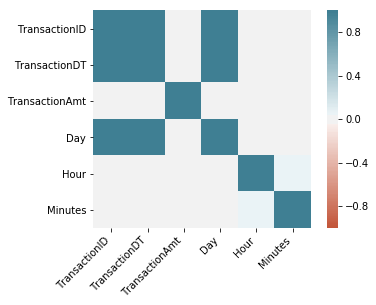

In [174]:
#printing and plotting the correlation matrix to show the correlation between TransactionAmt and Transaction time
import seaborn as sns
corr = transTime87.corr()
print('Correlation between TransactionID, TransactionDT, TransactionAmt, Day, Hour, Minutes')
print(corr)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the correlation matrix we can see that the correlation between the TransactionAmt and transaction Hour as **0.037795**.<br>
Also, the correlation matrix plot shows that there isn't much correlation between any of the fields except for the obvious ones.

<h2>**Part 5 - Interesting Plot**</h2>

(0, 800)

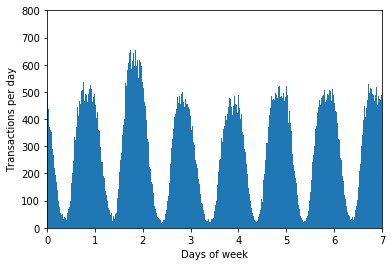

In [175]:
#Frequency of transactions over the week
plt.hist((train_data['TransactionDT']/(3600*24))%7, bins=2000)
plt.xlim(0,7)
plt.xlabel('Days of week')
plt.ylabel('Transactions per day')
plt.ylim(0,800)

From the above plot we can see that 2 days(Day 1 and Day 2 from plot) in the week having slightly higher peaks compared to the other 5 days. This can imply that the 2 days represent the weekends and can be the reason for higher number of transactions.

<h2>**Part 6 - Prediction Model**</h2>

In [176]:
#method to clean data
def data(df1):
    df = df1.copy()
    df['dist1'].fillna(df['dist1'].mean(), inplace=True)
    df['dist2'].fillna(df['dist2'].mean(), inplace=True)
    tmp = df[['dist1', 'dist2']]

    df[['card4', 'card6']].dropna(inplace=True)
    df['card4_numerical'] = pd.Categorical(df.card4).codes
    df['card6_numerical'] = pd.Categorical(df.card6).codes
    df['TransactionAmt_updated'] = df['TransactionAmt']/df['TransactionAmt'].mean()
    df['ProductCD_numerical'] = pd.Categorical(df.ProductCD).codes
    df['TransactionWeekday'] = np.floor((df['TransactionDT'] / (3600 * 24) - 1) % 7)
    df['TransactionHour'] = np.floor(df['TransactionDT'] / 3600) % 24
    df['P_emaildomain'].fillna('other',inplace=True)
    df['P_emaildomain_cat'] = pd.Categorical(df['P_emaildomain']).codes
    for c in ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']:
        df[c] = df[c]/df[c].mean()
    
    tmp = pd.concat([tmp, df[['TransactionID','card4_numerical', 'card6_numerical', \
                              'TransactionAmt_updated', 'ProductCD_numerical', 'TransactionHour',\
                              'TransactionWeekday', 'P_emaildomain_cat']+['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']]], axis=1)
    return tmp

In [177]:
features_to_train = ['dist1', 'dist2', 'card4_numerical', 'card6_numerical',\
                     'TransactionAmt_updated', 'ProductCD_numerical', 'TransactionWeekday', \
                     'TransactionHour', 'P_emaildomain_cat'] + ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
target = ['isFraud']

#cleaning train data
cleaned_train_data = data(train_transaction_df)

#splitting the data into train andd test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_train_data[features_to_train], train_transaction_df[target], test_size=0.25, random_state=42)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [178]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
#method to check the accuracy on local data
def compute_roc_auc(clf,index):
    y_predict = clf.predict_proba(cleaned_train_data.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(target_data.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [180]:
#initializing the model objects
lr = LogisticRegression()
rr = RandomForestClassifier(50)

In [181]:
#training logistic regression and random forests models
lr.fit(X_train, y_train)
rr.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
#making predictions on test data to check accuracy
predictionslr = lr.predict_proba(X_test[features_to_train])
predictionsrf = rr.predict_proba(X_test[features_to_train])
print(f'roc_auc_score logistic regression: {roc_auc_score(y_test, predictionslr[:,1])}')
print(f'roc_auc_score random forest: {roc_auc_score(y_test, predictionsrf[:,1])}')

roc_auc_score logistic regression: 0.7369523070762594
roc_auc_score random forest: 0.9055845990649891


In [183]:
#reading test data
test_transactions_df = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')
test_identity_df = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')

In [184]:
#cleaning test data
test_data = data(test_transactions_df)
test_data.fillna(0, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [185]:
#making predictions on test data and writing to submissions file
predictions = lr.predict_proba(test_data[features_to_train])[:,1]
submissions_df = pd.DataFrame(data = {
'TransactionID': test_data.TransactionID,
    'isFraud': predictions
})
submissions_df.to_csv('./submissions_lr_C_added.csv', index=False)

Performed some cleaning(as below) on the data and then split it into train data and test data for applying models. <br>
Cleaning: 
* replaced the null values in dist1, dist2 by their means
* Dropepd the null values in card4, card6 and categorized the values
* Calculated the day of week and hour of the day using TransactionDT
* replaced the null values in email columns with 'Other'
<br><br>
Used LogisticRegression and RandomForestClassifier libraries form sklearn and trained two models with X_train and y_train.<br>
Tested the above 2 models with X_test and y_test. Then calculated the roc_auc_score and accuracy.<br>
<br>
Predicted the isFraud values for the test data from kaggle and saved the result to submission file.




<h2>**Part 7 - Final Result**</h2>

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: [www.kaggle.com/ujwalvemulasbu](https://www.kaggle.com/ujwalvemulasbu)

Highest Rank: 5295

Score: 0.8137

Number of entries: 3

INCLUDE IMAGE OF YOUR KAGGLE RANKING
[https://drive.google.com/open?id=1MOwjOlipe9xqO8CnzQT01bIENZzYCl4p](https://drive.google.com/open?id=1MOwjOlipe9xqO8CnzQT01bIENZzYCl4p)